# Santiago Mosquera Erazo
# Diego Andrés Erira Benítez
# Daniel Jesus Pino Silgado

# **Taller # 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers,models,optimizers

# Red neuronal con keras

**grados farenheit a celsius**

In [ ]:
# Modelo para pasar de grados farenheit a celsius
grados_farenheit = np.array([20, 40, 100, 45, 50, 120, 200,250, 5])
grados_celsius = np.array([-6.6, 4.4, 37.7, 7.22, 10, 48.8, 93.3, 121.1, -1 ])

In [ ]:
#red neuronal secuencial con tres capas densas.
def modeloS():
  model = models.Sequential()
  model.add(layers.Dense(2,input_shape=[1])) #La primera capa densa tiene 2 neuronas y toma una entrada de un tensor de rango uno (vector)
  model.add(layers.Dense(2)) #La segunda capa densa tiene 2 neuronas, no se especifica una entrada porque la capa recibirá automáticamente la salida de la capa anterior
  model.add(layers.Dense(1)) #La tercera capa densa tiene una sola neurona, lo que indica que el modelo producirá una sola salida.
  return model

#modelops es un modelo de red neuronal entrenado para realizar una tarea de regresión
modelops = modeloS()

In [ ]:
modelops.summary() #resumen de la arquitectura del modelomostrando información sobre cada capa, como el nombre de la capa, el tamaño de la salida y el número de parámetros entrenables y no entrenables de cada capa

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configurar la fase de entrenamiento del modelo. El optimizador es Adam,la función de pérdida es el error cuadrático medio y la métrica es también el error cuadrático medio
modelops.compile(optimizer=optimizers.Adam(lr=0.1),loss='mse', metrics=['mse']) 

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#fit() en Keras se utiliza para entrenar un modelo de red neuronal
#x: los datos de entrada para el modelo (los valores de los predictores).
#y: los datos de salida esperados (los valores de la variable objetivo).
#epochs: el modelo se ajustará a los datos de entrenamiento durante 200 épocas antes de que el entrenamiento termine
#verbose: el nivel de detalle de los mensajes de salida durante el entrenamiento.
history = modelops.fit(x=grados_farenheit,y=grados_celsius,epochs=200, verbose=False)

In [ ]:
#Los detalles del entrenamiento, como la pérdida y las métricas, se almacenan en history.
#Lista que contiene el valor de la función de pérdida en cada época del entrenamiento del modelo
history.history['loss']

[934.78125,
 738.6551513671875,
 540.5906982421875,
 111.2186050415039,
 238.47132873535156,
 407.16851806640625,
 359.4134521484375,
 201.66290283203125,
 99.8311996459961,
 125.34464263916016,
 204.7967987060547,
 216.51800537109375,
 152.2218780517578,
 93.99799346923828,
 91.92709350585938,
 127.28456115722656,
 155.295166015625,
 149.73841857910156,
 116.51145935058594,
 83.34968566894531,
 76.30926513671875,
 95.17861938476562,
 112.12825012207031,
 104.32308959960938,
 80.6346206665039,
 65.86112976074219,
 69.98274993896484,
 81.64203643798828,
 84.71981811523438,
 74.7408676147461,
 61.01161575317383,
 55.74778747558594,
 60.84718322753906,
 66.1491470336914,
 62.56342315673828,
 53.2368049621582,
 47.73064422607422,
 49.32750701904297,
 52.58675003051758,
 51.34114074707031,
 45.720069885253906,
 41.00831985473633,
 40.80287170410156,
 42.71385192871094,
 42.01382827758789,
 38.1788330078125,
 34.96874237060547,
 34.72116470336914,
 35.59580612182617,
 34.72951126098633,
 32.

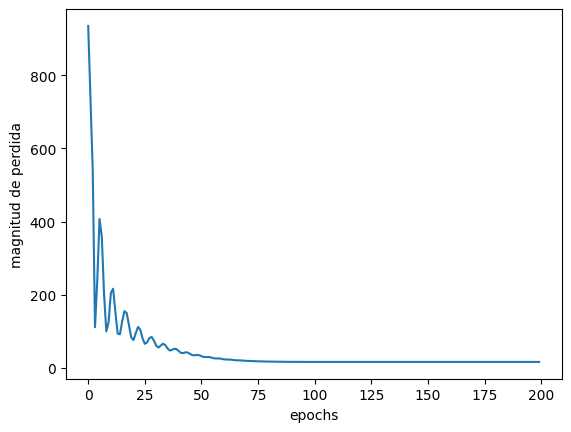

In [ ]:
plt.xlabel('epochs')
plt.ylabel('magnitud de perdida')
plt.plot(history.history['loss'])

In [ ]:
#Realizar una predicción para una entrada de temperatura de 300 grados Fahrenheit
resultado = modelops.predict([300])
print(f"El resultado es {resultado} °celsius")

1/1 [==============================] - 0s 368ms/step
El resultado es [[145.92479]] °celsius


**grados celsius a kelvin**

In [ ]:
celsius = np.array([30,15,0,100,150,40,450,36.7,40.72,67], dtype=float)
kelvin = np.array([303.15,288.15,273.15,373.15,423.15,313.15,723.15,309.85,313.87,340.15], dtype=float)

In [ ]:
modelo = modeloS()
modelo.compile(optimizer=optimizers.Adam(lr=0.1),loss='mse', metrics=['mse'])
historia =  modelo.fit(x=celsius,y=kelvin,epochs=200, verbose=False )

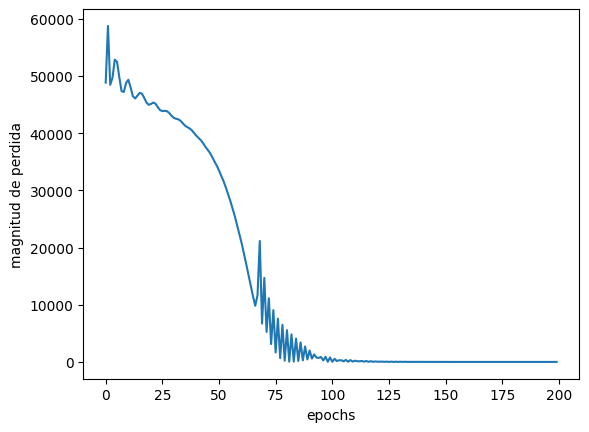

In [ ]:
plt.xlabel('epochs')
plt.ylabel('magnitud de perdida')
plt.plot(historia.history['loss'])

In [ ]:
kelvin_predict = modelo.predict([150])
print(f'la temperatura es {kelvin_predict} °kelvin')

1/1 [==============================] - 0s 88ms/step
la temperatura es [[423.09418]] °kelvin


# Red neuronal con numpy

In [ ]:
housing = pd.read_csv('/content/housing.csv')
housing.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
# se inicia la red neuronal
def iniciar(capas_dim):
  parameters = {}
  L = len(capas_dim)         
  for l in range(0, L-1):
        parameters['W' + str(l+1)] = np.random.rand(capas_dim[l], capas_dim[l+1])
        parameters['b' + str(l+1)] = np.random.rand(1, capas_dim[l+1])
  return parameters


In [ ]:
#se crean las funciones de activación sigmoid y relu

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        return np.where(x <= 0,0,1)
    else:    
        return np.maximum(0,x)

In [ ]:
#funcion de perdida que permite ajustar los parametros random

def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [ ]:
#entrenamiento de la red

def train(X,lr,params,training=True):
  #foward
  L = len(capas_dim)
  params['A0'] = X
  for k in range(0,L-1):
    params['Z' + str(k+1)] = np.matmul(params['A' + str(k)],params['W' + str(k+1)]) + params['b' + str(k+1)]
    params['A' + str(k+1)] = relu(params['Z' + str(k+1)])
  
  output = params['A' + str(L-1)]
  error = mse(Y_std,output,True)

  if training:
    #backpropagation
    for k in range(L-1,0,-1):
      params['dZ' + str(k)] = error * relu(params['A' + str(k)],True)
      params['dW' + str(k)] = np.matmul(params['A' + str(k-1)].T,params['dZ' + str(k)])

      params['W' + str(k)] = params['W' + str(k)] - params['dW' + str(k)] * lr
      params['b' + str(k)] = params['b' + str(k)] - (np.mean(params['dZ' + str(k)],axis=0, keepdims=True)) * lr

  return output

In [ ]:
#estandarizar los datos
def std(X,Y):
  X = (X - np.mean(X, axis=0))/(np.std(X,axis=0))
  Y = (Y - np.mean(Y, axis=0))/(np.std(Y,axis=0))
  Y = Y[:,np.newaxis]

  return X,Y

In [ ]:
#datos
X = housing[['RM','LSTAT','PTRATIO']].to_numpy()
Y = housing['MEDV'].to_numpy()


capas_dim = [3, 4, 3, 1]
epochs = 1000
params = iniciar(capas_dim)
errors = []
# X = stand(X)
X_std, Y_std = std(X,Y)
for _ in range(epochs):
    output = train(X_std,0.0001,params)
    errors.append(mse(Y_std,output))
    #print(mse(Y_std,output))

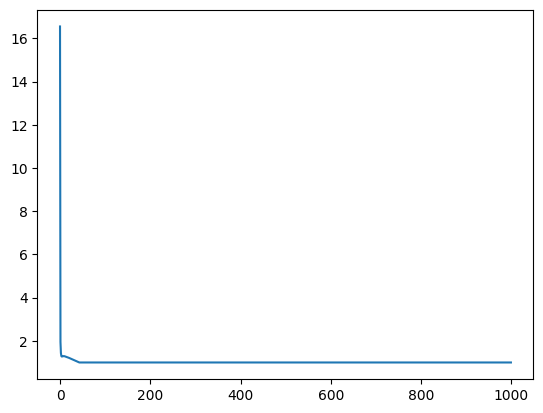

In [ ]:
plt.plot(errors) # Grafica de los errores

In [ ]:
#Se hace una predicción
data_test = [6.5, 5.2, 18.7]
y = np.array(data_test)
for k in range (0,len(capas_dim)-1):
  y = np.matmul(y,params['W' + str(k+1)]) + params['b' + str(k+1)]

print(y)

[[597269.8388799]]
